In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def one_hot_encoding_plus(df):
    one_hot_berlin = pd.get_dummies(df['Venue Category'])
    one_hot_berlin['Neighbourhood']=df['Neighbourhood']
    one_hot_berlin_count=one_hot_berlin.groupby('Neighbourhood').sum()
    return one_hot_berlin_count
    
    
def best_cluster_num(df,num_k):
    from sklearn.cluster import KMeans
    var=2
    fake_iner=np.inf
    iner=[]
    for k in range(2,num_k):
        model=KMeans(n_clusters=k,random_state=42,verbose=False,n_init='auto')
        model.fit(df)
        iner.append(model.inertia_)
        if (fake_iner - model.inertia_) > 200:
            fake_iner=model.inertia_
            var=k
    return var ,iner



def cluster_df(k,df):
    from sklearn.cluster import KMeans
    model=KMeans(n_clusters=k,random_state=42,verbose=False,n_init='auto')
    model.fit(df)
    return model.labels_


def plot_best_k(df,var , inertia):
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(len(inertia)),inertia,marker='o', linestyle='--')
    plt.axvline(x=var, color='red', linestyle='--', label='Vertical Line at x=3')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)

    

def most_common_venue(df):
    df=df.drop('cluster',axis=1)
    dic={}
    col = [f'{i+1}th Most Common Venue' for i in range(len(df.columns))]
    for n in df.index:
        idx=df.loc[n].sort_values(ascending=False).index
        dic[n]=idx
    return pd.DataFrame(dic,index=col).T
    
    
    
def final_result(df,num_k):
    df_count=one_hot_encoding_plus(df)
    var , iner = best_cluster_num(df_count,num_k=num_k)
    print(plot_best_k(df_count,var,iner))
    df_count['cluster']=cluster_df(int(var),df_count)
    return most_common_venue(df_count)
    

    

def map_city_clusters(df_merged, longitude, latitude):
    import folium 
    # create map
    map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
    
    colors = [
    "#FF0000",  # Red
    "#00FF00",  # Green
    "#0000FF",  # Blue
    "#FFFF00",  # Yellow
    "#FF00FF",  # Magenta
    "#00FFFF",  # Cyan
    "#FF8000",  # Orange
    "#8000FF",  # Purple
    "#0080FF",  # Light Blue
    "#FF0080",  # Pink
    "#80FF00",  # Lime
    "#008000",  # Dark Green
    "#800000",  # Maroon
    "#008080",  # Teal
    "#808080",  # Gray
    "#C0C0C0",  # Silver
    "#800080",  # Purple
    "#FFC0CB",  # Pink
    "#FFA500",  # Orange
    "#FFD700"   # Gold
]


    # add markers to the map
    for lat, lon, neigh, cluster in zip(df_merged['Neighbourhood Latitude'],\
                                        df_merged['Neighbourhood Longitude'], \
                                        df_merged['Neighbourhood'],\
                                        df_merged['cluster']):
        label = str(neigh) + ' (Cluster ' + str(cluster) + ')'
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=colors[cluster],
            fill=True,
            fill_color=colors[cluster],
            fill_opacity=0.7).add_to(map_clusters)

    return map_clusters

# Most common Venue Categories at each Neighbourhood

## Berlin

In [3]:
df_berlin_venues = pd.read_csv('../data/df_berlin_venues.csv')

In [4]:
one_hot_berlin_count=one_hot_encoding_plus(df_berlin_venues)
one_hot_berlin_count.head()

Adult Store  African Restaurant  \
Neighbourhood                                                 
Charlottenburg-Wilmersdorf            0                   0   
Friedrichshain-Kreuzberg              0                   0   
Lichtenberg                           0                   0   
Marzahn-Hellersdorf                   0                   0   
Mitte                                 1                   0   

                            Argentinian Restaurant  Art Gallery  Art Museum  \
Neighbourhood                                                                 
Charlottenburg-Wilmersdorf                       0            0           1   
Friedrichshain-Kreuzberg                         0            1           0   
Lichtenberg                                      0            0           0   
Marzahn-Hellersdorf                              0            0           0   
Mitte                                            0            5           2   

                            Arts and Entertainment  Asian Restaurant  \
Neighbourhood                                                          
Charlottenburg-Wilmersdorf                       0                 0   
Friedrichshain-Kreuzberg                         1                 0   
Lichtenberg                                      0                 0   
Marzahn-Hellersdorf                              0                 0   
Mitte                                            0                 0   

                            Austrian Restaurant  BBQ Joint  Bakery  ...  \
Neighbourhood                                                       ...   
Charlottenburg-Wilmersdorf                    0          0       0  ...   
Friedrichshain-Kreuzberg                      1          1       3  ...   
Lichtenberg                                   0          0       0  ...   
Marzahn-Hellersdorf                           0          0       0  ...   
Mitte                                         0          0       0  ...   

                            Tram Station  Trattoria  Turkish Restaurant  \
Neighbourhood                                                             
Charlottenburg-Wilmersdorf             0          1                   0   
Friedrichshain-Kreuzberg               0          1                   0   
Lichtenberg                            3          0                   0   
Marzahn-Hellersdorf                    0          0                   0   
Mitte                                  0          0                   0   

                            Vegan and Vegetarian Restaurant  \
Neighbourhood                                                 
Charlottenburg-Wilmersdorf                                0   
Friedrichshain-Kreuzberg                                  3   
Lichtenberg                                               0   
Marzahn-Hellersdorf                                       0   
Mitte                                                     0   

                            Vietnamese Restaurant  Vintage and Thrift Store  \
Neighbourhood                                                                 
Charlottenburg-Wilmersdorf                      0                         0   
Friedrichshain-Kreuzberg                        2                         0   
Lichtenberg                                     0                         0   
Marzahn-Hellersdorf                             0                         0   
Mitte                                           1                         0   

                            Waterfront  Wine Bar  Wine Store  Women's Store  
Neighbourhood                                                                
Charlottenburg-Wilmersdorf           0         0           0              0  
Friedrichshain-Kreuzberg             2         1           1              0  
Lichtenberg                          0         0           0              0  
Marzahn-Hellersdorf                  0         0           0              0  
Mitte      

5


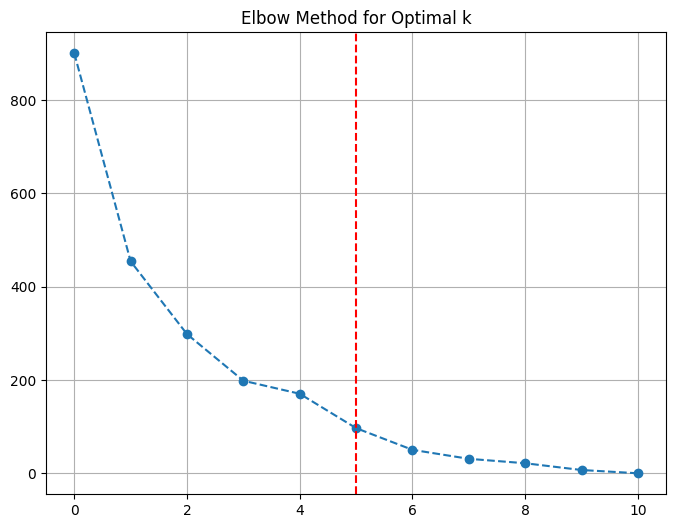

In [5]:
var , iner = best_cluster_num(one_hot_berlin_count,num_k=13)
print(var)
plot_best_k(one_hot_berlin_count,var,iner)

In [6]:
one_hot_berlin_count['cluster']=cluster_df(5,one_hot_berlin_count)

In [7]:
merged_berlin =df_berlin_venues.merge(one_hot_berlin_count, on='Neighbourhood',how='inner')
merged_berlin.head()

Neighbourhood  Neighbourhood Latitude  \
0  Charlottenburg-Wilmersdorf               52.507856   
1  Charlottenburg-Wilmersdorf               52.507856   
2  Charlottenburg-Wilmersdorf               52.507856   
3  Charlottenburg-Wilmersdorf               52.507856   
4  Charlottenburg-Wilmersdorf               52.507856   

   Neighbourhood Longitude                 Venue  Venue Latitude  \
0                13.263952       Adik's Stehcafe       52.507889   
1                13.263952         Die Wühlmäuse       52.508830   
2                13.263952           Block House       52.509393   
3                13.263952  Hotel Villa Kastania       52.510310   
4                13.263952                 Rasas       52.512100   

   Venue Longitude     Venue Category  Adult Store  African Restaurant  \
0        13.258131               Café            0                   0   
1        13.270733        Comedy Club            0                   0   
2        13.270958         Steakhouse            0                   0   
3        13.268223              Hotel            0                   0   
4        13.264464  Indian Restaurant            0                   0   

   Argentinian Restaurant  ...  Trattoria  Turkish Restaurant  \
0                       0  ...          1                   0   
1                       0  ...          1                   0   
2                       0  ...          1                   0   
3                       0  ...          1                   0   
4                       0  ...          1                   0   

   Vegan and Vegetarian Restaurant  Vietnamese Restaurant  \
0                                0                      0   
1                                0                      0   
2                                0                      0   
3                                0                      0   
4                                0                      0   

   Vintage and Thrift Store  Waterfront  Wine Bar  Wine Store  Women's Store  \
0                         0           0         0           0              0   
1                         0           0         0           0              0   
2                         0           0         0           0              0   
3                         0           0         0           0              0   
4                         0           0         0           0              0   

   cluster  
0        4  
1        4  
2        4  
3        4  
4        4  

[5 rows x 168 columns]

In [8]:
map_city_clusters(merged_berlin,merged_berlin['Neighbourhood Longitude'][0],merged_berlin['Neighbourhood Latitude'][0])

In [9]:
most_venue_berlin = most_common_venue(one_hot_berlin_count)
most_venue_berlin.head()

1th Most Common Venue 2th Most Common Venue  \
Charlottenburg-Wilmersdorf    Italian Restaurant              Pizzeria   
Friedrichshain-Kreuzberg                    Café                 Hotel   
Lichtenberg                         Tram Station          Fuel Station   
Marzahn-Hellersdorf                  Supermarket             Drugstore   
Mitte                                      Hotel        History Museum   

                               3th Most Common Venue 4th Most Common Venue  \
Charlottenburg-Wilmersdorf                      Café          Fuel Station   
Friedrichshain-Kreuzberg            Ice Cream Parlor                   Bar   
Lichtenberg                 Furniture and Home Store                  Café   
Marzahn-Hellersdorf                    Metro Station              Bus Stop   
Mitte                                    Art Gallery     German Restaurant   

                            5th Most Common Venue 6th Most Common Venue  \
Charlottenburg-Wilmersdorf      German Restaurant              Bus Stop   
Friedrichshain-Kreuzberg              Coffee Shop            Night Club   
Lichtenberg                 Motorcycle Dealership                 Hotel   
Marzahn-Hellersdorf             German Restaurant      Doner Restaurant   
Mitte                                    Monument           Coffee Shop   

                           7th Most Common Venue  \
Charlottenburg-Wilmersdorf                 Plaza   
Friedrichshain-Kreuzberg                  Bakery   
Lichtenberg                        Hot Dog Joint   
Marzahn-Hellersdorf           Pet Supplies Store   
Mitte                                       Café   

                                      8th Most Common Venue  \
Charlottenburg-Wilmersdorf                            Hotel   
Friedrichshain-Kreuzberg    Vegan and Vegetarian Restaurant   
Lichtenberg                             Car Wash and Detail   
Marzahn-Hellersdorf                                    Lake   
Mitte                                                Church   

                           9th Most Common Venue 10th Most Common Venue  ...  \
Charlottenburg-Wilmersdorf   Fried Chicken Joint           Burger Joint  ...   
Friedrichshain-Kreuzberg                  Hostel  Vietnamese Restaurant  ...   
Lichtenberg                        Big Box Store         Hardware Store  ...   
Marzahn-Hellersdorf                Shopping Mall          Bowling Alley  ...   
Mitte                                     Museum                  Plaza  ...   

                           151th Most Common Venue  \
Charlottenburg-Wilmersdorf    Fast Food Restaurant   
Friedrichshain-Kreuzberg            Hardware Store   
Lichtenberg                    Dumpling Restaurant   
Marzahn-Hellersdorf              Electronics Store   
Mitte                                  Karaoke Bar   

                                152th Most Common Venue  \
Charlottenburg-Wilmersdorf               Farmers Market   
Friedrichshain-Kreuzberg               Greek Restaurant   
Lichtenberg                 Eastern European Restaurant   
Marzahn-Hellersdorf                             Exhibit   
Mitte                              Jazz and Blues Venue   

                           153th Most Common Venue 154th Most Common Venue  \
Charlottenburg-Wilmersdorf           Eyecare Store                 Exhibit   
Friedrichshain-Kreuzberg                   Gay Bar               Gastropub   
Lichtenberg                      Electronics Store                 Exhibit   
Marzahn-Hellersdorf                  Eyecare Store      Falafel Restaurant   
Mitte                          Japanese Restaurant      Italian Restaurant   

                           155th Most Common Venue  \
Charlottenburg-Wilmersdorf       Electronics Store   
Friedrichshain-Kreuzberg                    Garden   
Lichtenberg                          Eyecare Store   
Marzahn-Hellersdorf                 Farmers Market   
Mitte                         Caucasian Restaurant   

               

## Alberta

In [10]:
df_alberta_venues =pd.read_csv('../data/df_alberta_venues.csv')

In [11]:
one_hot_alberta_count=one_hot_encoding_plus(df_alberta_venues)
one_hot_alberta_count.head()

American Restaurant  Art Gallery  \
Neighbourhood                                                   
Anders Park                                    0            0   
Aspen Ridge                                    0            0   
Bower                                          0            0   
Bower Ponds Recreation Area                    1            0   
Central Park                                   1            0   

                             Arts and Crafts Store  Arts and Entertainment  \
Neighbourhood                                                                
Anders Park                                      0                       0   
Aspen Ridge                                      0                       0   
Bower                                            1                       0   
Bower Ponds Recreation Area                      0                       0   
Central Park                                     0                       0   

                             Asian Restaurant  Automotive Repair Shop  \
Neighbourhood                                                           
Anders Park                                 0                       0   
Aspen Ridge                                 0                       0   
Bower                                       1                       1   
Bower Ponds Recreation Area                 0                       0   
Central Park                                0                       0   

                             BBQ Joint  Bakery  Bar  Beer Bar  ...  \
Neighbourhood                                                  ...   
Anders Park                          1       0    0         0  ...   
Aspen Ridge                          0       0    0         0  ...   
Bower                                0       0    0         0  ...   
Bower Ponds Recreation Area          0       0    0         0  ...   
Central Park                         0       0    0         0  ...   

                             Thai Restaurant  Tourist Information and Service  \
Neighbourhood                                                                   
Anders Park                                0                                0   
Aspen Ridge                                0                                0   
Bower                                      0                                0   
Bower Ponds Recreation Area                0                                0   
Central Park                               0                                0   

                             Toy Store  Travel and Transportation  \
Neighbourhood                                                       
Anders Park                          0                          0   
Aspen Ridge                          0                          0   
Bower                                1                          0   
Bower Ponds Recreation Area          0                          0   
Central Park                         0                          0   

                             Turkish Restaurant  \
Neighbourhood                                     
Anders Park                                   0   
Aspen Ridge                                   0   
Bower                                         0   
Bower Ponds Recreation Area                   0   
Central Park                                  0   

                             Vegan and Vegetarian Restaurant  \
Neighbourhood                                                  
Anders Park                                                0   
Aspen Ridge                                                0   
Bower                                                      0   
Bower Ponds Recreation Area                                0   
Central Park                                               0   

                             Vietnamese Restaurant  \
Neighbourhood                                        
Anders Park                                      0   
As

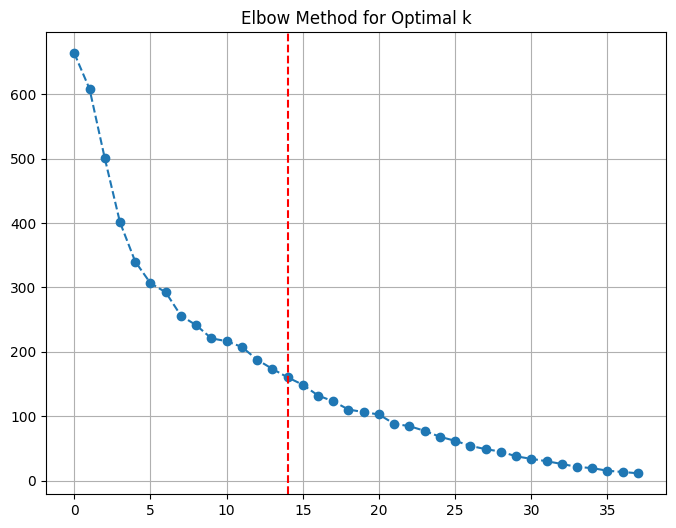

In [12]:
var , iner = best_cluster_num(one_hot_alberta_count,num_k=40)
plot_best_k(one_hot_alberta_count,var,iner)

In [13]:
one_hot_alberta_count['cluster']=cluster_df(14,one_hot_alberta_count)

In [14]:
merged_alberta =df_alberta_venues.merge(one_hot_alberta_count, on='Neighbourhood',how='inner')
merged_alberta.head()

Neighbourhood  Neighbourhood Latitude  Neighbourhood Longitude  \
0   Anders Park               52.247423              -113.783334   
1   Anders Park               52.247423              -113.783334   
2   Anders Park               52.247423              -113.783334   
3   Anders Park               52.247423              -113.783334   
4   Aspen Ridge               52.238277              -113.770874   

                                Venue  Venue Latitude  Venue Longitude  \
0                    Red Boar Smokery       52.250931      -113.793571   
1                               Mac's       52.251460      -113.773495   
2                    Japanese Delight       52.251899      -113.772996   
3  Arnz Contracting & Custom Painting       52.255005      -113.775562   
4          State & Main Kitchen & Bar       52.239262      -113.768301   

        Venue Category  American Restaurant  Art Gallery  \
0            BBQ Joint                    0            0   
1    Convenience Store                    0            0   
2  Japanese Restaurant                    0            0   
3               Retail                    0            0   
4           Restaurant                    0            0   

   Arts and Crafts Store  ...  Tourist Information and Service  Toy Store  \
0                      0  ...                                0          0   
1                      0  ...                                0          0   
2                      0  ...                                0          0   
3                      0  ...                                0          0   
4                      0  ...                                0          0   

   Travel and Transportation  Turkish Restaurant  \
0                          0                   0   
1                          0                   0   
2                          0                   0   
3                          0                   0   
4                          0                   0   

   Vegan and Vegetarian Restaurant  Vietnamese Restaurant  \
0                                0                      0   
1                                0                      0   
2                                0                      0   
3                                0                      0   
4                                0                      0   

   Warehouse or Wholesale Store  Whisky Bar  Wine Store  cluster  
0                             0           0           0        3  
1                             0           0           0        3  
2                             0           0           0        3  
3                             0           0           0        3  
4                             0           0           0       11  

[5 rows x 155 columns]

In [15]:
map_city_clusters(merged_alberta,merged_alberta['Neighbourhood Longitude'][0],merged_alberta['Neighbourhood Latitude'][0])

In [16]:
most_venue_alberta = most_common_venue(one_hot_alberta_count)
most_venue_alberta.head()

1th Most Common Venue 2th Most Common Venue  \
Anders Park                   Japanese Restaurant                Retail   
Aspen Ridge                            Restaurant          Fuel Station   
Bower                              Clothing Store           Coffee Shop   
Bower Ponds Recreation Area   American Restaurant           Coffee Shop   
Central Park                     Ice Cream Parlor     Electronics Store   

                            3th Most Common Venue 4th Most Common Venue  \
Anders Park                             BBQ Joint     Convenience Store   
Aspen Ridge                  Fast Food Restaurant     Convenience Store   
Bower                        Fast Food Restaurant                   Pub   
Bower Ponds Recreation Area    Seafood Restaurant              Pizzeria   
Central Park                  American Restaurant           Supermarket   

                               5th Most Common Venue 6th Most Common Venue  \
Anders Park                      American Restaurant              Pizzeria   
Aspen Ridge                            Grocery Store           Coffee Shop   
Bower                        New American Restaurant            Restaurant   
Bower Ponds Recreation Area     Other Great Outdoors         Grocery Store   
Central Park                                    Park                   Pub   

                            7th Most Common Venue 8th Most Common Venue  \
Anders Park                  Other Great Outdoors                  Park   
Aspen Ridge                   American Restaurant              Pharmacy   
Bower                            Ice Cream Parlor              Pharmacy   
Bower Ponds Recreation Area  Fast Food Restaurant              Dive Bar   
Central Park                          Coffee Shop            Smoke Shop   

                             9th Most Common Venue 10th Most Common Venue  \
Anders Park                            Pastry Shop     Persian Restaurant   
Aspen Ridge                                   Park            Pastry Shop   
Bower                                          Inn           Burger Joint   
Bower Ponds Recreation Area    Indie Movie Theater               Beer Bar   
Central Park                 Sporting Goods Retail     Italian Restaurant   

                             ...   138th Most Common Venue  \
Anders Park                  ...               Flea Market   
Aspen Ridge                  ...  Food and Beverage Retail   
Bower                        ...  Furniture and Home Store   
Bower Ponds Recreation Area  ...  Furniture and Home Store   
Central Park                 ...      Fast Food Restaurant   

                            139th Most Common Venue   140th Most Common Venue  \
Anders Park                              Food Truck             Garden Center   
Aspen Ridge                              Food Truck              Flower Store   
Bower                                  Fuel Station        Frozen Yogurt Shop   
Bower Ponds Recreation Area            Fuel Station        Frozen Yogurt Shop   
Central Park                           Flower Store  Furniture and Home Store   

                              141th Most Common Venue  \
Anders Park                  Food and Beverage Retail   
Aspen Ridge                               Flea Market   
Bower                             Fried Chicken Joint   
Bower Ponds Recreation Area       Fried Chicken Joint   
Central Park                               Food Truck   

                              142th Most Common Venue  \
Anders Park                         French Restaurant   
Aspen Ridge                            Farmers Market   
Bower                               French Restaurant   
Bower Ponds Recreation Area         French Restaurant   
Central Park                 Food and Beverage Retail   

                              143th Most Common Venue 144th Most Common Venue  \
Anders Park                       Fried Chicken Joint      Frozen Yogurt Shop   
Aspen Ridge                        

## New Orelans

In [17]:
df_newOrleans_venues = pd.read_csv('../data/df_newOrleans_venues.csv')

In [18]:
one_hot_neworleans_count=one_hot_encoding_plus(df_newOrleans_venues)
one_hot_neworleans_count.head()

American Restaurant  Amusement Park  Animal Shelter  \
Neighbourhood                                                         
ALGIERS POINT                     0               0               0   
AUDUBON                           1               0               0   
B. W. COOPER                      0               0               0   
BAYOU ST. JOHN                    0               0               0   
BEHRMAN                           0               0               0   

                Antique Store  Arepa Restaurant  Art Gallery  Art Museum  \
Neighbourhood                                                              
ALGIERS POINT               0                 0            0           0   
AUDUBON                     0                 0            0           0   
B. W. COOPER                0                 0            0           0   
BAYOU ST. JOHN              0                 0            0           0   
BEHRMAN                     0                 0            0           0   

                Arts and Crafts Store  Arts and Entertainment  \
Neighbourhood                                                   
ALGIERS POINT                       1                       0   
AUDUBON                             0                       0   
B. W. COOPER                        0                       0   
BAYOU ST. JOHN                      0                       0   
BEHRMAN                             1                       0   

                Asian Restaurant  ...  Vintage and Thrift Store  \
Neighbourhood                     ...                             
ALGIERS POINT                  0  ...                         0   
AUDUBON                        0  ...                         0   
B. W. COOPER                   0  ...                         0   
BAYOU ST. JOHN                 0  ...                         0   
BEHRMAN                        0  ...                         0   

                Warehouse or Wholesale Store  Waterfront  Whisky Bar  \
Neighbourhood                                                          
ALGIERS POINT                              0           0           0   
AUDUBON                                    0           0           0   
B. W. COOPER                               0           0           0   
BAYOU ST. JOHN                             0           0           0   
BEHRMAN                                    0           0           0   

                Wine Bar  Wine Store  Wings Joint  Women's Store  Zoo  \
Neighbourhood                                                           
ALGIERS POINT          0           0            1              0    0   
AUDUBON                0           0            0              0    1   
B. W. COOPER           0           0            0              0    0   
BAYOU ST. JOHN         0           0            0              0    0   
BEHRMAN                0           0            1              0    0   

                Zoo Exhibit  
Neighbourhood                
ALGIERS POINT             0  
AUDUBON                   9  
B. W. COOPER              0  
BAYOU ST. JOHN            0  
BEHRMAN                   0  

[5 rows x 263 columns]

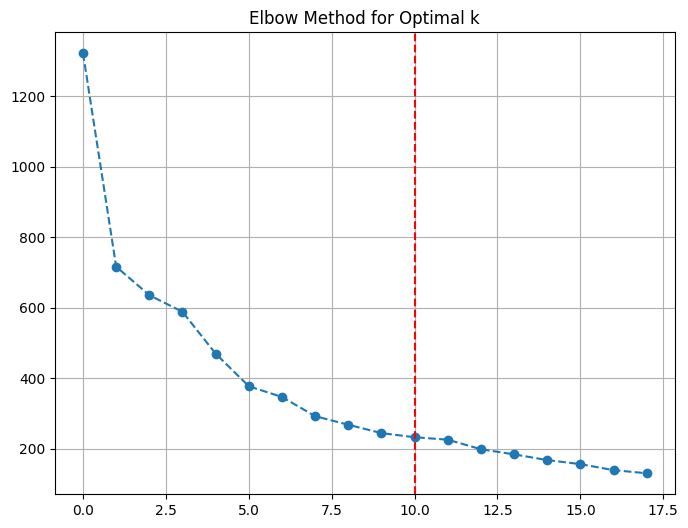

In [19]:
var , iner = best_cluster_num(one_hot_alberta_count,num_k=20)
plot_best_k(one_hot_alberta_count,var,iner)

In [20]:
one_hot_neworleans_count['cluster']=cluster_df(10,one_hot_neworleans_count)

In [21]:
merged_neworleans =df_newOrleans_venues.merge(one_hot_neworleans_count, on='Neighbourhood',how='inner')
merged_neworleans.head()

Neighbourhood  Neighbourhood Latitude  Neighbourhood Longitude  \
0  U.S. NAVAL BASE               41.343637               -72.093486   
1  U.S. NAVAL BASE               41.343637               -72.093486   
2  U.S. NAVAL BASE               41.343637               -72.093486   
3  U.S. NAVAL BASE               41.343637               -72.093486   
4  U.S. NAVAL BASE               41.343637               -72.093486   

                          Venue  Venue Latitude  Venue Longitude  \
0      Fort Trumbull State Park       41.343732       -72.093851   
1  Captain Scott's Lobster Dock       41.347774       -72.097789   
2       Sweetie's Bakery & Cafe       41.352108       -72.096146   
3                     City Pier       41.351772       -72.095263   
4              The Neon Chicken       41.347135       -72.100278   

             Venue Category  American Restaurant  Amusement Park  \
0  State or Provincial Park                    0               0   
1        Seafood Restaurant                    0               0   
2              Cupcake Shop                    0               0   
3            Scenic Lookout                    0               0   
4  Southern Food Restaurant                    0               0   

   Animal Shelter  ...  Warehouse or Wholesale Store  Waterfront  Whisky Bar  \
0               0  ...                             0           0           0   
1               0  ...                             0           0           0   
2               0  ...                             0           0           0   
3               0  ...                             0           0           0   
4               0  ...                             0           0           0   

   Wine Bar  Wine Store  Wings Joint  Women's Store  Zoo  Zoo Exhibit  cluster  
0         0           0            0              0    0            0        7  
1         0           0            0              0    0            0        7  
2         0           0            0              0    0            0        7  
3         0           0            0              0    0            0        7  
4         0           0            0              0    0            0        7  

[5 rows x 271 columns]

In [22]:
map_city_clusters(merged_neworleans,merged_neworleans['Neighbourhood Longitude'][1],merged_neworleans['Neighbourhood Latitude'][1])

In [23]:
most_venue_neworleans = most_common_venue(one_hot_alberta_count)
most_venue_neworleans.head()

1th Most Common Venue 2th Most Common Venue  \
Anders Park                   Japanese Restaurant                Retail   
Aspen Ridge                            Restaurant          Fuel Station   
Bower                              Clothing Store           Coffee Shop   
Bower Ponds Recreation Area   American Restaurant           Coffee Shop   
Central Park                     Ice Cream Parlor     Electronics Store   

                            3th Most Common Venue 4th Most Common Venue  \
Anders Park                             BBQ Joint     Convenience Store   
Aspen Ridge                  Fast Food Restaurant     Convenience Store   
Bower                        Fast Food Restaurant                   Pub   
Bower Ponds Recreation Area    Seafood Restaurant              Pizzeria   
Central Park                  American Restaurant           Supermarket   

                               5th Most Common Venue 6th Most Common Venue  \
Anders Park                      American Restaurant              Pizzeria   
Aspen Ridge                            Grocery Store           Coffee Shop   
Bower                        New American Restaurant            Restaurant   
Bower Ponds Recreation Area     Other Great Outdoors         Grocery Store   
Central Park                                    Park                   Pub   

                            7th Most Common Venue 8th Most Common Venue  \
Anders Park                  Other Great Outdoors                  Park   
Aspen Ridge                   American Restaurant              Pharmacy   
Bower                            Ice Cream Parlor              Pharmacy   
Bower Ponds Recreation Area  Fast Food Restaurant              Dive Bar   
Central Park                          Coffee Shop            Smoke Shop   

                             9th Most Common Venue 10th Most Common Venue  \
Anders Park                            Pastry Shop     Persian Restaurant   
Aspen Ridge                                   Park            Pastry Shop   
Bower                                          Inn           Burger Joint   
Bower Ponds Recreation Area    Indie Movie Theater               Beer Bar   
Central Park                 Sporting Goods Retail     Italian Restaurant   

                             ...   138th Most Common Venue  \
Anders Park                  ...               Flea Market   
Aspen Ridge                  ...  Food and Beverage Retail   
Bower                        ...  Furniture and Home Store   
Bower Ponds Recreation Area  ...  Furniture and Home Store   
Central Park                 ...      Fast Food Restaurant   

                            139th Most Common Venue   140th Most Common Venue  \
Anders Park                              Food Truck             Garden Center   
Aspen Ridge                              Food Truck              Flower Store   
Bower                                  Fuel Station        Frozen Yogurt Shop   
Bower Ponds Recreation Area            Fuel Station        Frozen Yogurt Shop   
Central Park                           Flower Store  Furniture and Home Store   

                              141th Most Common Venue  \
Anders Park                  Food and Beverage Retail   
Aspen Ridge                               Flea Market   
Bower                             Fried Chicken Joint   
Bower Ponds Recreation Area       Fried Chicken Joint   
Central Park                               Food Truck   

                              142th Most Common Venue  \
Anders Park                         French Restaurant   
Aspen Ridge                            Farmers Market   
Bower                               French Restaurant   
Bower Ponds Recreation Area         French Restaurant   
Central Park                 Food and Beverage Retail   

                              143th Most Common Venue 144th Most Common Venue  \
Anders Park                       Fried Chicken Joint      Frozen Yogurt Shop   
Aspen Ridge                        

In [39]:
concat_df = pd.concat([df_alberta_venues,df_berlin_venues,df_newOrleans_venues])

In [40]:
concat_df.to_csv('../data/concat_df.csv',index=False)